## Augment

#### 증감 전
- pass(3) : 506장
- fail(3) : 747장
- pass(4) : 1089장
- fail(4) : 5장

#### 증감 후
- pass(3) : 705장
- fail(3) : 747장
- pass(4) : 1089장
- fail(4) : 1004장

In [3]:
import random
import numpy as np
import numpy
import os
import cv2
import glob
from PIL import Image, ImageEnhance, ImageFilter
import PIL.ImageOps  

# 새로 만들 이미지 개수
num_augmented_images = 200

# 원본 파일
file_path = r'C:\Users\amk25\D\백업 이미지(최종)\fail(4)'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1 #몇번의 augmentation이 일어났는지를 확인

def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = numpy.matrix(matrix, dtype=float)  # Use `float` instead of `numpy.float`
    B = numpy.array(pb).reshape(8)

    res = numpy.linalg.solve(A, B)
    return res.tolist()

for i in range(1, num_augmented_images):
    change_picture_index = random.randrange(1, total_origin_image_num-1)
    print(change_picture_index)
    print(file_names[change_picture_index])
    file_name = file_names[change_picture_index]
    
    origin_image_path = 'C:\\Users\\amk25\\D\\백업 이미지(최종)\\fail(4)\\' + file_name
    print(origin_image_path)
    image = Image.open(origin_image_path)
    random_augment = random.randrange(1,6)
    if(random_augment == 1):
        #이미지 좌우 반전
        print("invert")
        inverted_image = image.transpose(Image.FLIP_TOP_BOTTOM)
        inverted_image.save(os.path.join(file_path, 'inverted_' + str(augment_cnt) + '.jpeg'))
        augment_cnt += 1 
        
    elif random_augment == 2:
        # 이미지 블러 처리
        print("blur")
        blur_strength = 5  # 블러 처리 강도 조절
        blurred_image = image.filter(ImageFilter.BLUR)
        for _ in range(blur_strength):  # 블러 효과를 여러 번 적용하여 강도를 높임
            blurred_image = blurred_image.filter(ImageFilter.BLUR)
        blurred_image.save(os.path.join(file_path, 'blurred_' + str(augment_cnt) + '.jpeg'))
        augment_cnt += 1 
        
    elif(random_augment == 3):
        # 이미지 밝기 조절 후 저장(예시 : 밝기 1.5배 증가)
        print("bright")
        enhancer = ImageEnhance.Brightness(image)
        brightened_img = enhancer.enhance(1.5)
        brightened_img.save(os.path.join(file_path, 'brightened_' + str(augment_cnt) + '.png'))
        augment_cnt += 1 
        
# 4,5는 (2),(4) 사진만 적용
    elif random_augment == 4:
        # 등변 사다리꼴 모양으로 이미지 변형
        print("skew1")
        width, height = image.size
        
        # 상단 꼭짓점은 그대로 유지하고 하단 꼭짓점은 왼쪽으로 0.15, 오른쪽으로 0.15 만큼 이동
        coeffs = find_coeffs(
            [(0, 0), (width, 0), (width, height), (0, height)],
            [(0, 0), (width, 0), (width + width * 0.15, height), (-width * 0.15, height)]
        )
        
        # 이미지 변형 (하단 부분만 좌우로 늘리기)
        transformed_image = image.transform(
            (width, height),  # 출력 이미지 크기
            Image.PERSPECTIVE,  # 변형 종류
            coeffs,  # 변형 계수
            resample=Image.BICUBIC  # 샘플링 방법
        )
        
        # 변형된 이미지 저장
        transformed_image.save(os.path.join(file_path, 'skew1_' + str(augment_cnt) + '.jpeg'))
        augment_cnt += 1 
        
    elif random_augment == 5:
        # 등변 사다리꼴 모양으로 이미지 변형
        print("skew2")
        width, height = image.size
        
        # 하단 꼭짓점은 그대로 유지하고 상단 꼭짓점은 왼쪽으로 0.15, 오른쪽으로 0.15 만큼 이동
        coeffs = find_coeffs(
            [(0, 0), (width, 0), (width, height), (0, height)],
            [(-width * 0.15, 0), (width + width * 0.15, 0), (width, height), (0, height)]
        )
        
        # 이미지 변형 (상단 부분만 좌우로 늘리기)
        transformed_image = image.transform(
            (width, height),  # 출력 이미지 크기
            Image.PERSPECTIVE,  # 변형 종류
            coeffs,  # 변형 계수
            resample=Image.BICUBIC  # 샘플링 방법
        )     
        # 변형된 이미지 저장
        transformed_image.save(os.path.join(file_path, 'skew2_' + str(augment_cnt) + '.jpeg'))
        augment_cnt += 1 

4
검사영역간섭_4JS15378(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS15378(4)_NG.jpeg
skew2
1
brightened_1.png
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\brightened_1.png
blur
4
검사영역간섭_4JS15378(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS15378(4)_NG.jpeg
skew1
4
검사영역간섭_4JS15378(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS15378(4)_NG.jpeg
invert
4
검사영역간섭_4JS15378(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS15378(4)_NG.jpeg
blur
4
검사영역간섭_4JS15378(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS15378(4)_NG.jpeg
invert
2
brightened_3.png
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\brightened_3.png
bright
3
검사영역간섭_4JS14612(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS14612(4)_NG.jpeg
skew2
4
검사영역간섭_4JS15378(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS15378(4)_NG.jpeg
skew2
3
검사영역간섭_4JS14612(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS14612(4)_NG.jpeg
skew2
5
검사영역간섭_4JS17012(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fa

3
검사영역간섭_4JS14612(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS14612(4)_NG.jpeg
invert
5
검사영역간섭_4JS17012(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS17012(4)_NG.jpeg
blur
2
brightened_3.png
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\brightened_3.png
skew2
6
본체투입전촬영_4JL04102(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\본체투입전촬영_4JL04102(4)_NG.jpeg
skew2
2
brightened_3.png
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\brightened_3.png
skew1
1
brightened_1.png
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\brightened_1.png
invert
4
검사영역간섭_4JS15378(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS15378(4)_NG.jpeg
skew1
2
brightened_3.png
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\brightened_3.png
skew1
5
검사영역간섭_4JS17012(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS17012(4)_NG.jpeg
skew1
2
brightened_3.png
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\brightened_3.png
invert
2
brightened_3.png
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\brightened_3.png
skew1
2
brightened_3.png
C:\Users\amk25\D\백업

6
본체투입전촬영_4JL04102(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\본체투입전촬영_4JL04102(4)_NG.jpeg
skew1
3
검사영역간섭_4JS14612(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS14612(4)_NG.jpeg
bright
5
검사영역간섭_4JS17012(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS17012(4)_NG.jpeg
invert
5
검사영역간섭_4JS17012(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS17012(4)_NG.jpeg
blur
1
brightened_1.png
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\brightened_1.png
blur
3
검사영역간섭_4JS14612(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS14612(4)_NG.jpeg
skew1
6
본체투입전촬영_4JL04102(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\본체투입전촬영_4JL04102(4)_NG.jpeg
invert
6
본체투입전촬영_4JL04102(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\본체투입전촬영_4JL04102(4)_NG.jpeg
skew1
1
brightened_1.png
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\brightened_1.png
skew2
5
검사영역간섭_4JS17012(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최종)\fail(4)\검사영역간섭_4JS17012(4)_NG.jpeg
blur
4
검사영역간섭_4JS15378(4)_NG.jpeg
C:\Users\amk25\D\백업 이미지(최

### Clipping
#### Augment, Clipping 순서를 바꿈으로써 검은 테두리가 나타나는 현상 보완

In [26]:
import os
file_path = r'C:\Users\amk25\D\백업 이미지(최종)\fail(4)'
image_file_path = [f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))]
print(image_file_path)

['blurred_103.jpeg', 'blurred_105.jpeg', 'blurred_106.jpeg', 'blurred_107.jpeg', 'blurred_108.jpeg', 'blurred_11.jpeg', 'blurred_110.jpeg', 'blurred_111.jpeg', 'blurred_112.jpeg', 'blurred_117.jpeg', 'blurred_120.jpeg', 'blurred_13.jpeg', 'blurred_132.jpeg', 'blurred_135.jpeg', 'blurred_138.jpeg', 'blurred_140.jpeg', 'blurred_143.jpeg', 'blurred_145.jpeg', 'blurred_147.jpeg', 'blurred_149.jpeg', 'blurred_150.jpeg', 'blurred_157.jpeg', 'blurred_159.jpeg', 'blurred_160.jpeg', 'blurred_162.jpeg', 'blurred_164.jpeg', 'blurred_165.jpeg', 'blurred_17.jpeg', 'blurred_173.jpeg', 'blurred_182.jpeg', 'blurred_183.jpeg', 'blurred_189.jpeg', 'blurred_191.jpeg', 'blurred_195.jpeg', 'blurred_199.jpeg', 'blurred_2.jpeg', 'blurred_200.jpeg', 'blurred_203.jpeg', 'blurred_206.jpeg', 'blurred_211.jpeg', 'blurred_212.jpeg', 'blurred_213.jpeg', 'blurred_215.jpeg', 'blurred_216.jpeg', 'blurred_221.jpeg', 'blurred_222.jpeg', 'blurred_224.jpeg', 'blurred_225.jpeg', 'blurred_227.jpeg', 'blurred_23.jpeg', 'blur

In [27]:
len(image_file_path)

1004

In [30]:
from PIL import Image
import matplotlib.pyplot as plt

output_folder = r'C:\Users\amk25\D\백업 이미지(최종)\새 폴더'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for i in range(0,len(image_file_path)):           
    # 원하는 파일 이름
    file_to_clip = image_file_path[i] 

    # 파일 경로 찾기
    for file_list in image_file_path:
        if file_to_clip in file_list:
            file_path = 'C:\\Users\\amk25\\D\\백업 이미지(최종)\\fail(4)\\' + file_to_clip
            break

    # 이미지를 열기
    original_image = Image.open(file_path)
    
    # (3) : x1, y1, x2, y2 = 100, 100, 400, 500
    # (4) : x1, y1, x2, y2 = 200, 110, 700, 600

    x1, y1, x2, y2 = 200, 110, 700, 600

    # 해당 영역을 클리핑
    clipped_image = original_image.crop((x1, y1, x2, y2))
    
    output_path = os.path.join(output_folder, f"clipped_fail_{i+1}.png")
    clipped_image.save(output_path)

### 훈련 + 검증

In [1]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from PIL import Image
import torch.nn.functional as F

# 사용자 정의 ImageFolder 클래스
class CustomImageFolder(ImageFolder):
    def __getitem__(self, index):
        path, _ = self.samples[index]
        sample = self.loader(path)
        if self.transform is not None:
            sample = self.transform(sample)
        if self.target_transform is not None:
            target = self.target_transform(path)  # 파일 경로를 target_transform에 전달
        return sample, target

# 라벨 지정 함수
def labeler(path):
    filename = os.path.basename(path)
    return 0 if 'fail' in filename else 1

# 이미지 변환 정의
transform = transforms.Compose([
    transforms.Resize((300, 400)),  # 모든 이미지를 224x224 크기로 조정
    transforms.ToTensor()
])

# 훈련 데이터셋 로드
train_dataset = CustomImageFolder(r'C:\Users\amk25\D\clipped_(3)',
                                  transform=transform, target_transform=labeler)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 테스트 데이터셋 로드
test_dataset = CustomImageFolder(r'C:\Users\amk25\D\clipped_(3)',
                                 transform=transform, target_transform=labeler)

# 검증 데이터셋으로 분할
val_size = int(0.7 * len(test_dataset))
test_size = len(test_dataset) - val_size
val_dataset, test_dataset = random_split(test_dataset, [val_size, test_size], generator=torch.Generator().manual_seed(42))
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [2]:
# CustomCNN 모델 정의
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 148 * 198, 128)  # 수정된 입력 크기
        self.fc2 = nn.Linear(128, 2)  # 이진 분류를 위해 출력 크기를 2로 변경

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        
#         # 현재 x의 크기를 출력하여 확인
#         print(x.size())  # 이 줄을 추가하여 x의 크기를 출력        
        
        x = x.view(-1, 64 * 148 * 198)  # 수정된 플래튼 크기
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델, 손실 함수, 최적화 함수 초기화
model = CustomCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 훈련 함수 정의
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc='Training', leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    return epoch_loss

# 검증 함수 정의
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(data_loader)
    epoch_acc = correct_predictions.float() / len(data_loader.dataset)
    return epoch_loss, epoch_acc

In [3]:
# 학습 및 검증
num_epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate_model(model, val_loader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

    # 조기 종료
    if epoch > 5:  # 조기 종료를 위한 임시 조건, 필요에 따라 조절
        break

# 모델 저장
# 모델 저장 경로 설정
save_path = r'C:\Users\amk25\D\clipped_(3)\model_weights_cnn.pth'
torch.save(model.state_dict(), save_path)

# 테스트 데이터 평가
test_loss, test_acc = evaluate_model(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

Epoch 1/3, Train Loss: 4.6485, Validation Loss: 0.0001, Validation Accuracy: 1.0000


Epoch 2/3, Train Loss: 0.0000, Validation Loss: 0.0000, Validation Accuracy: 1.0000


Epoch 3/3, Train Loss: 0.0000, Validation Loss: 0.0000, Validation Accuracy: 1.0000
Test Loss: 0.0000, Test Accuracy: 1.0000


In [4]:
import os
import torch
from torchvision import transforms
from PIL import Image
from torchvision.models import efficientnet_v2_s
import torch.nn.functional as F

# # 사전 훈련된 EfficientNetV2 모델을 불러오고, 분류기 부분을 수정합니다.
# model = efficientnet_v2_s(pretrained=False)
# num_features = model.classifier[1].in_features
# model.classifier[1] = torch.nn.Linear(num_features, 2)  # 2개의 클래스로 분류하기 위해 변경

# 모델의 가중치를 불러옵니다. 가중치 파일이 'model_weights.pth'라고 가정합니다.
model.load_state_dict(torch.load(save_path, map_location=torch.device('cpu')))
model.eval()  # 모델을 평가 모드로 설정

# 장치 설정 - 이 예제에서는 CPU를 사용합니다.
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

# 이미지 변환 정의
transform = transforms.Compose([
    transforms.Resize((300, 400)),  # 이미지 크기 조정
    transforms.ToTensor()           # 이미지를 PyTorch 텐서로 변환
])

# './test_dataset' 폴더에서 이미지 파일 목록을 가져옵니다.
test_dataset_path = r'C:\Users\amk25\D\(3)_test'
image_files = [f for f in os.listdir(test_dataset_path) if os.path.isfile(os.path.join(test_dataset_path, f)) and f.lower().endswith(('png', 'jpg', 'jpeg'))]
image_paths = [os.path.join(test_dataset_path, img_file) for img_file in image_files]

# 실제 레이블은 파일명에 'pass' 또는 'fail' 포함 여부에 따라 결정됩니다.
actual_labels = [0 if 'fail' in img_file else 1 for img_file in image_files]

# 예측 및 일치율 계산
for path, actual_label in zip(image_paths, actual_labels):
    image = Image.open(path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        outputs = model(image)
        probabilities = F.softmax(outputs, dim=1)
        predicted = torch.max(probabilities, 1)[1]
        probability = probabilities[0, predicted.item()].item()  # 예측된 클래스의 확률
    
    # 일치율을 퍼센트로 변환
    similarity_percent = 100 * probability
    
    print(f'File: {os.path.basename(path)}, Actual Label: {actual_label}, Predicted Label: {predicted.item()}, Similarity: {similarity_percent:.2f}%')

File: clipped_fail_40.png, Actual Label: 0, Predicted Label: 0, Similarity: 100.00%
File: clipped_fail_41.png, Actual Label: 0, Predicted Label: 0, Similarity: 100.00%
File: clipped_fail_42.png, Actual Label: 0, Predicted Label: 0, Similarity: 100.00%
File: clipped_pass_1.png, Actual Label: 1, Predicted Label: 1, Similarity: 100.00%
File: clipped_pass_10.png, Actual Label: 1, Predicted Label: 1, Similarity: 100.00%
File: clipped_pass_2.png, Actual Label: 1, Predicted Label: 1, Similarity: 100.00%
File: clipped_pass_3.png, Actual Label: 1, Predicted Label: 1, Similarity: 100.00%
File: clipped_pass_4.png, Actual Label: 1, Predicted Label: 1, Similarity: 100.00%
File: clipped_pass_5.png, Actual Label: 1, Predicted Label: 1, Similarity: 100.00%
File: clipped_pass_6.png, Actual Label: 1, Predicted Label: 1, Similarity: 100.00%
File: clipped_pass_7.png, Actual Label: 1, Predicted Label: 1, Similarity: 100.00%
File: clipped_pass_8.png, Actual Label: 1, Predicted Label: 1, Similarity: 100.00%


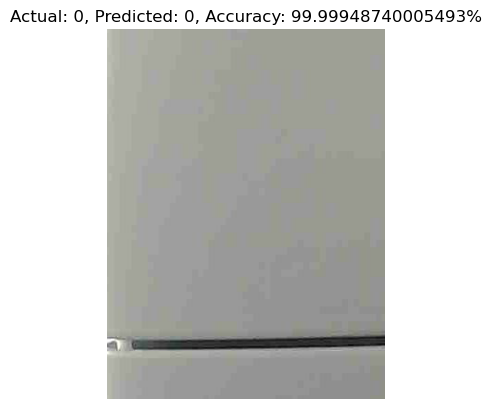

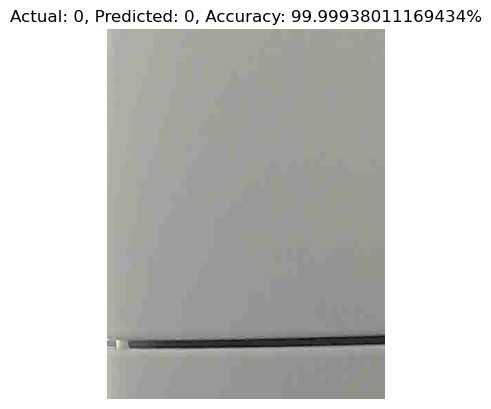

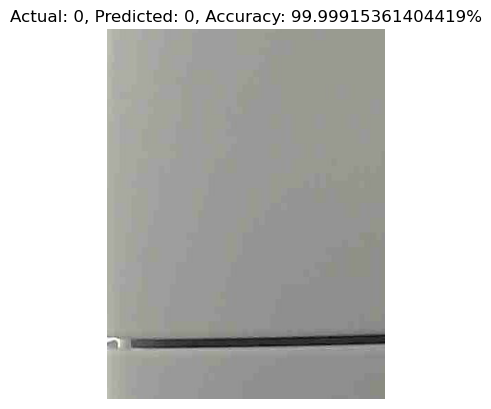

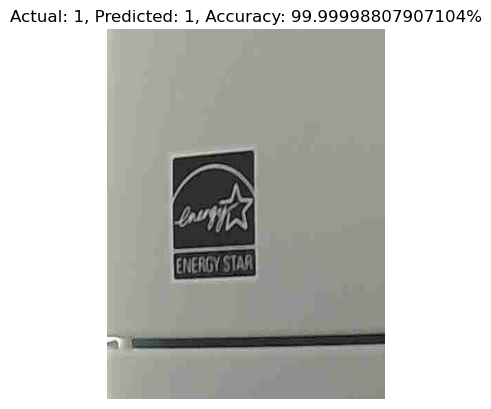

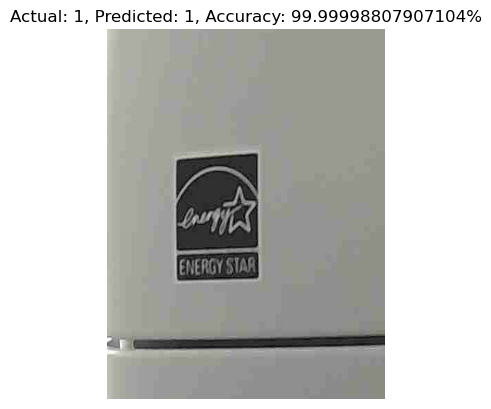

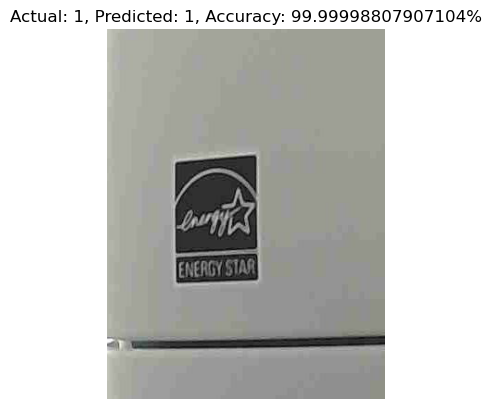

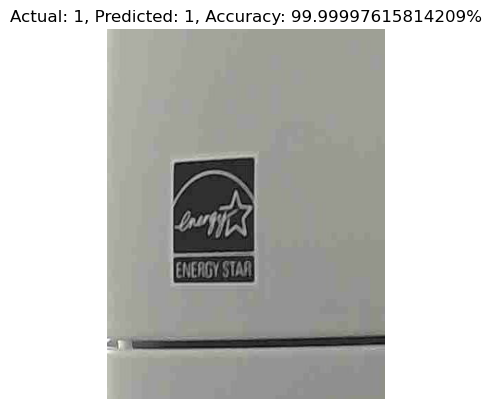

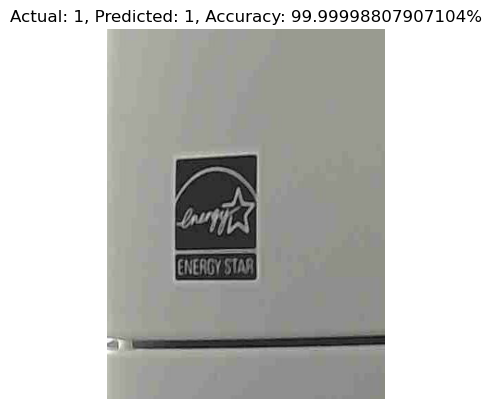

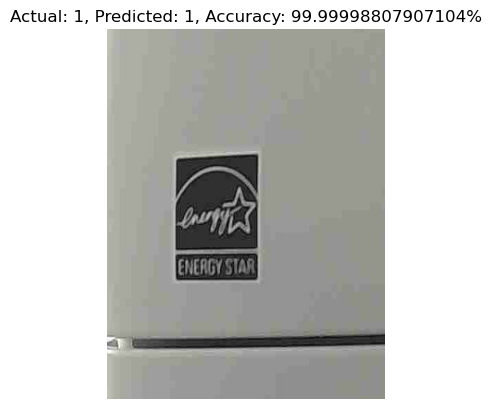

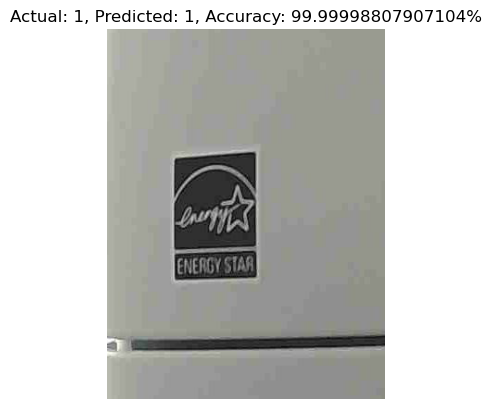

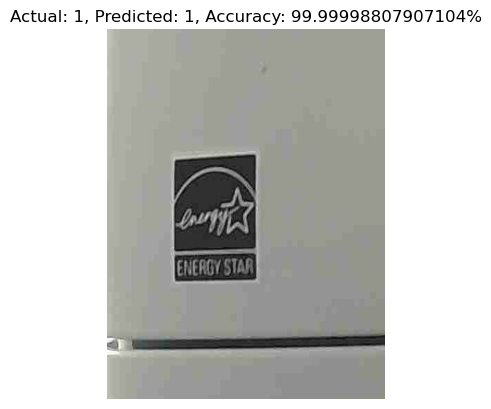

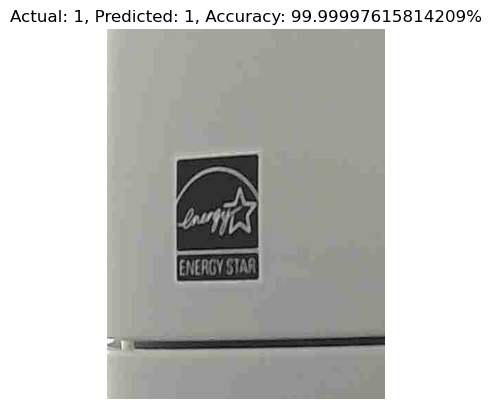

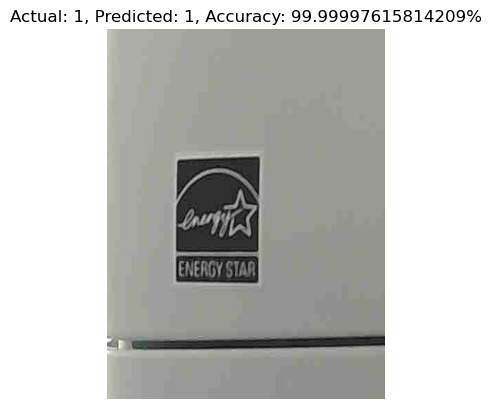

In [5]:
import matplotlib.pyplot as plt

# 이미지 파일의 경로, 실제 레이블, 예측 레이블, 일치율을 출력하고 이미지를 띄우는 함수
def display_image_with_label(path, actual_label, predicted_label, accuracy_percent):
    image = Image.open(path)
    plt.imshow(image)
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}, Accuracy: {accuracy_percent}%')
    plt.axis('off')  # 축을 끕니다.
    plt.show()

# 예측 및 일치율 계산
for path, actual_label in zip(image_paths, actual_labels):
    image = Image.open(path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        outputs = model(image)
        probabilities = F.softmax(outputs, dim=1)
        predicted = torch.max(probabilities, 1)[1]
        probability = probabilities[0, predicted.item()].item()  # 예측된 클래스의 확률
    
    # 일치율을 퍼센트로 변환
    similarity_percent = 100 * probability
    
    # 이미지와 레이블 정보를 출력하고 이미지를 띄웁니다.
    display_image_with_label(path, actual_label, predicted.item(), similarity_percent)


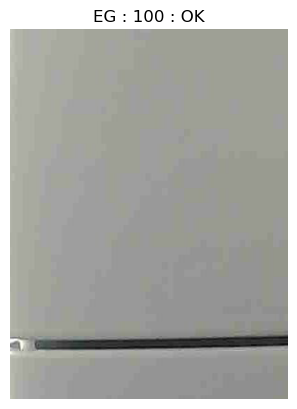

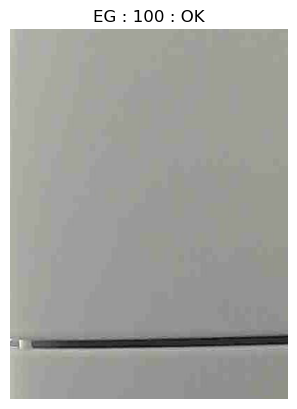

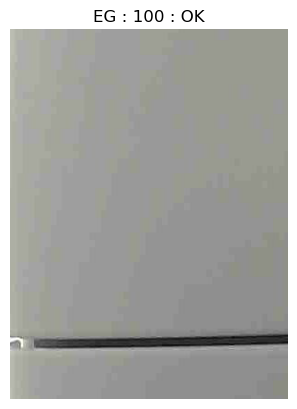

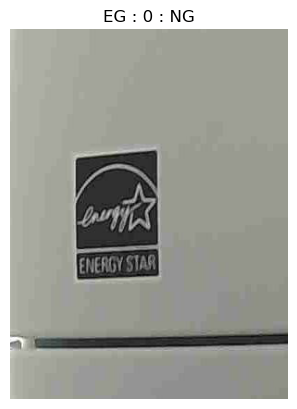

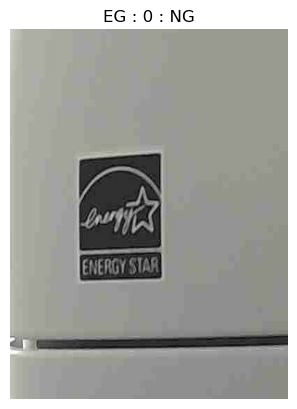

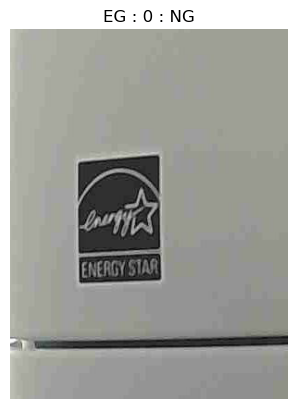

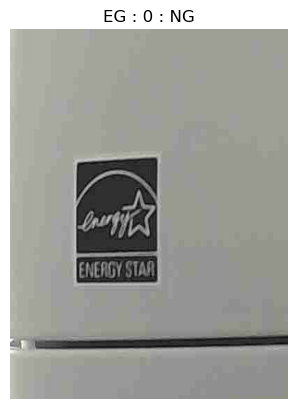

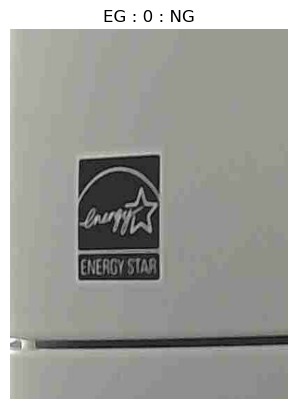

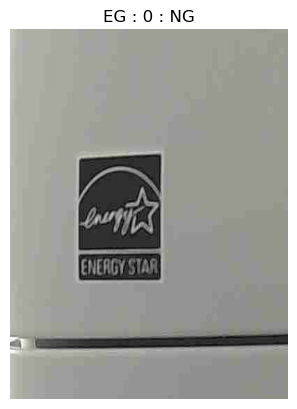

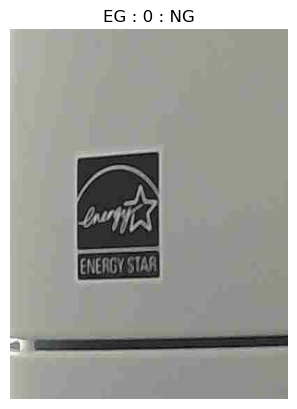

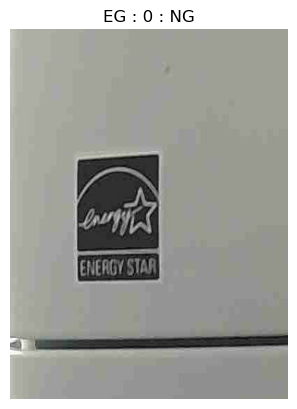

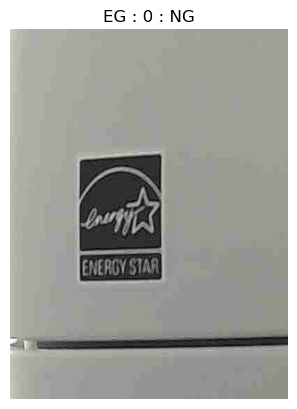

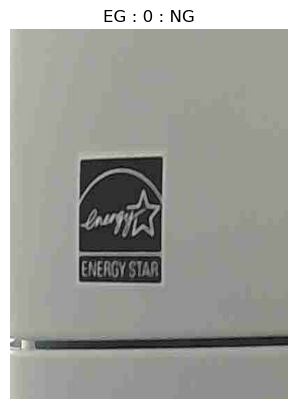

In [14]:
# 이미지 파일의 경로, 실제 레이블, 예측 레이블, 일치율을 출력하고 이미지를 띄우는 함수
import matplotlib.pyplot as plt

# 이미지 파일의 경로, 실제 레이블, 예측 레이블, 일치율을 출력하고 이미지를 띄우는 함수
def display_image_with_label(path, actual_label, predicted_label, accuracy_percent):
    image = Image.open(path)
    plt.imshow(image)
    
    # 조건에 따른 결과 표시
    if actual_label == 1 and predicted_label == 1:
        result = "NG"
    elif actual_label == predicted_label and accuracy_percent >= 90:
        result = "OK"
    else:
        result = "NG"

    plt.title(f'EG : {accuracy_percent:.0f} : {result}')
    plt.axis('off')
    plt.show()

# 예측 및 일치율 계산
for path, actual_label in zip(image_paths, actual_labels):
    image = Image.open(path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        outputs = model(image)
        probabilities = F.softmax(outputs, dim=1)
        predicted = torch.max(probabilities, 1)[1]
        
        # 클래스 1에 속할 확률을 추출하고 퍼센트로 변환
        probability_class_1 = probabilities[0, 0].item()  # 레이블 1에 속할 확률
        similarity_percent = 100 * probability_class_1
    
    # 이미지와 레이블 정보를 출력하고 이미지를 띄웁니다.
    display_image_with_label(path, actual_label, predicted.item(), similarity_percent)
